In [3]:
%matplotlib inline

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


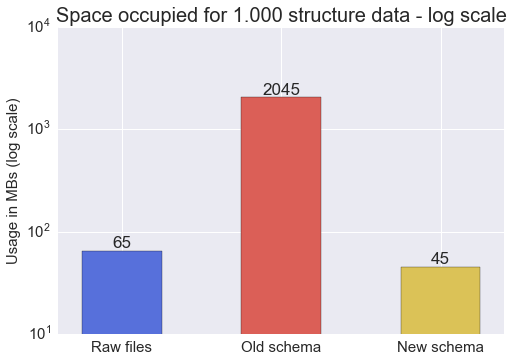

In [5]:
# Space savings experiments performed on small dataset 
# with 1k structure files provided by Leopold

axis_size = 15
val_size = 17
title_size = 20

objects = ('Raw files', 'Old schema', 'New schema')
# y_pos = np.arange(len(objects))
y_pos = [0, 0.5, 1]
performance = [65, 2045, 45]
width = 0.25
cols = sns.color_palette("hls", 8)

bar = plt.bar(y_pos, performance, width, align='center', 
              log=True, color=[cols[5], cols[0], cols[1]])
plt.xticks(y_pos, objects, fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.ylabel('Usage in MBs (log scale)', fontsize=axis_size)
plt.title('Space occupied for 1.000 structure data - log scale', fontsize=title_size)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, 
             '%d' % int(height), ha='center', va='bottom', fontsize=val_size)


# plt.show()
# fig = plt.figure()
# # Instead of set_figwidth(30)
# fig.set_size_inches(10, fig.get_figheight(), forward=True)

plt.savefig("space_small.svg")

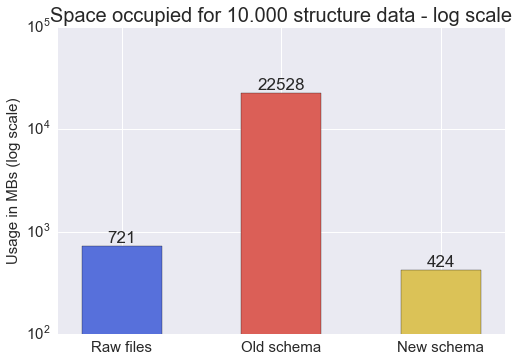

In [6]:
# Space savings experiments performed on medium sized dataset 
# with 10k structure files provided by Leopold

axis_size = 15
val_size = 17
title_size = 20

objects = ('Raw files', 'Old schema', 'New schema')
# y_pos = np.arange(len(objects))
y_pos = [0, 0.5, 1]
performance = [721, 22528, 424]
width = 0.25
cols = sns.color_palette("hls", 8)

bar = plt.bar(y_pos, performance, width, align='center', 
              log=True, color=[cols[5], cols[0], cols[1]])
plt.xticks(y_pos, objects, fontsize=axis_size)
plt.yticks(fontsize=axis_size)
plt.ylabel('Usage in MBs (log scale)', fontsize=axis_size)
plt.title('Space occupied for 10.000 structure data - log scale', fontsize=title_size)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, 
             '%d' % int(height), ha='center', va='bottom', fontsize=val_size)


# plt.show()
# fig = plt.figure()
# # Instead of set_figwidth(30)
# fig.set_size_inches(10, fig.get_figheight(), forward=True)

plt.savefig("space.svg")
# plt.savefig("space.pdf")

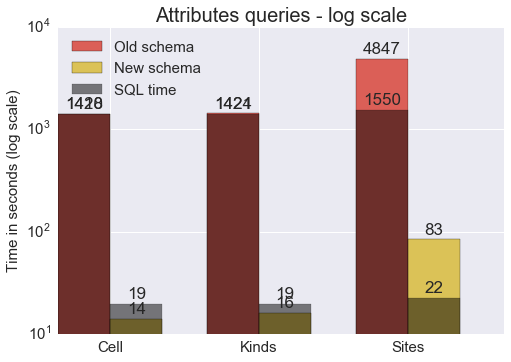

In [8]:
# JSON speed-up experiments performed by Spyros (repeating Jocelyn's attribute experiments)
# With a Django database provided by Mounet and a 

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

old_schema = [1418.280104875, 1424.71781945, 4847.579882783333333]
old_schema_sql = [1420.238260, 1421.563346, 1550.4463995]
new_schema = [14.03484153745, 16.1302175522, 83.6736856699]
new_schema_sql = [19.524500333333333333, 19.750318333333333333333, 22.436775333333333333333]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, old_schema, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind, old_schema_sql, width, log=True, color='black', alpha=0.5)

rects2_sql = ax.bar(ind + width, new_schema_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects1_sql[0]), ('Old schema', 'New schema', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_spy.svg")

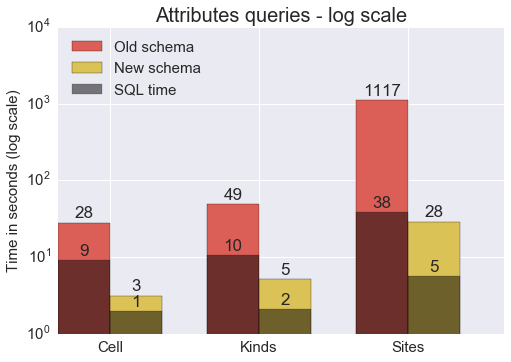

In [9]:
# JSON speed-up experiments performed by Jocelyn

axis_size = 15
val_size = 17
title_size = 20
legent_size = 15

old_schema = [28.13, 49.22, 1117.03]
old_schema_sql = [9.18, 10.6, 38.73]
new_schema = [3.13, 5.19, 28.82]
new_schema_sql = [1.96, 2.08, 5.64]
indices = ("cell", "kinds", "sites")

ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the barc
cols = sns.color_palette("hls", 8)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, old_schema, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, new_schema, width, log=True, color=cols[1])

rects1_sql = ax.bar(ind, old_schema_sql, width, log=True, color='black', alpha=0.5)

rects2_sql = ax.bar(ind + width, new_schema_sql, width, log=True, color='black', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)', fontsize=axis_size)
ax.set_title('Attributes queries - log scale', fontsize=title_size)
ax.set_xticks(ind + width)
plt.yticks(fontsize=axis_size)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'), fontsize=axis_size)

ax.legend((rects1[0], rects2[0], rects1_sql[0]), ('Old schema', 'New schema', 'SQL time'), 
          fontsize=legent_size, loc="upper left")

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=val_size)
        
autolabel(rects1)
autolabel(rects1_sql)
autolabel(rects2)
autolabel(rects2_sql)

plt.savefig("attr_queries_joc.svg")

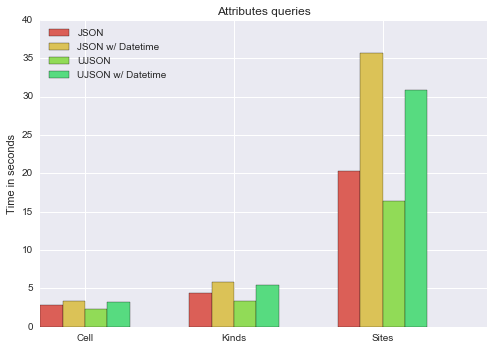

In [16]:
json = [2.90, 4.44, 20.29]
json_dt = [3.36, 5.83, 35.7]
ujson = [2.36, 3.41, 16.40]
ujson_dt = [3.17, 5.40, 30.88]

w = 0.15

fig, ax = plt.subplots()
rect1 = ax.bar(ind, json, w, color=cols[0])

rect2 = ax.bar(ind + w, json_dt, w, color=cols[1])

rect3 = ax.bar(ind + w*2, ujson, w, color=cols[2])

rect4 = ax.bar(ind + w*3, ujson_dt, w, color=cols[3])

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds')
ax.set_title('Attributes queries')
ax.set_xticks(ind + w*2)
ax.set_xticklabels(('Cell', 'Kinds', 'Sites'))

ax.legend((rect1[0], rect2[0], rect3[0], rect4[0]), ('JSON', 'JSON w/ Datetime', 'UJSON', 'UJSON w/ Datetime'), loc=2)

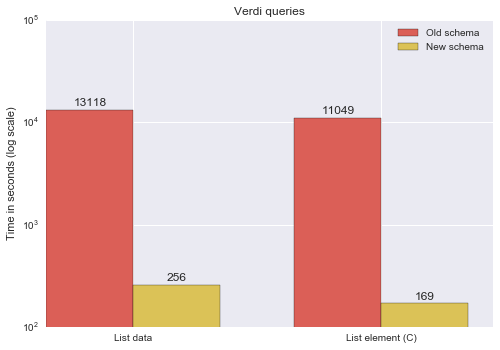

In [17]:
fig, ax = plt.subplots()
ind = np.arange(2)
django = [13118, 11049]
sqla = [256, 169]
width = 0.35
rects1 = ax.bar(ind, django, width, log=True, color=cols[0])

rects2 = ax.bar(ind + width, sqla, width, log=True, color=cols[1])

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds (log scale)')
ax.set_title('Verdi queries')
ax.set_xticks(ind + width)
ax.set_xticklabels(('List data', 'List element (C)'))

ax.legend((rects1[0], rects2[0]), ('Old schema', 'New schema'))

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

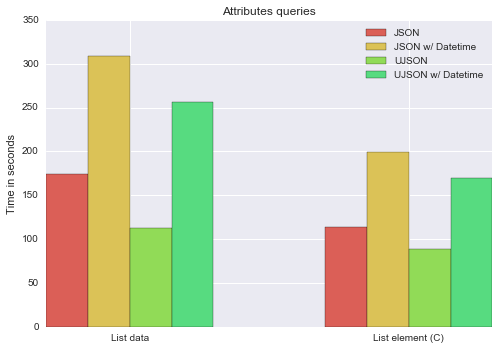

In [18]:
json = [173.92, 113.46]
json_dt = [308.92, 199.46]
ujson = [113.20, 88.81]
ujson_dt = [256.80, 169.79]

w = 0.15

fig, ax = plt.subplots()
rect1 = ax.bar(ind, json, w, color=cols[0])

rect2 = ax.bar(ind + w, json_dt, w, color=cols[1])

rect3 = ax.bar(ind + w*2, ujson, w, color=cols[2])

rect4 = ax.bar(ind + w*3, ujson_dt, w, color=cols[3])

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds')
ax.set_title('Attributes queries')
ax.set_xticks(ind + w*2)
ax.set_xticklabels(('List data', 'List element (C)'))

ax.legend((rect1[0], rect2[0], rect3[0], rect4[0]), ('JSON', 'JSON w/ Datetime', 'UJSON', 'UJSON w/ Datetime'))